**Loading, Processing, and Displaying Sample Image from CSV Dataset**

In [ ]:
# Load the dataset from the CSV file manually
with open('/content/Mnist dataset.csv') as file:  # Open the CSV file containing the MNIST dataset
    lines = file.readlines()  # Read all lines from the file into a list

# Convert CSV lines to numerical data
data = []  # Initialize an empty list to store the numerical data
for line in lines[1:]:  # Iterate over all lines except the first (header row)
    data.append([int(value) for value in line.strip().split(',')])  # Convert comma-separated values to integers and add to the data list

# Split data into labels and pixel values
labels = [row[0] for row in data]  # Extract the first value from each row as the label
pixels = [row[1:] for row in data]  # Extract the remaining values as pixel intensity data

# Reshape data into 28x28 images
images = []  # Initialize an empty list to store reshaped images
for row in pixels:  # Iterate over each row of pixel data
    images.append([[row[i * 28 + j] for j in range(28)] for i in range(28)])  # Reshape the flat list of 784 pixels into a 28x28 grid

# Display a sample image and label
sample_index = 0  # Index of the sample to display
print(f"Sample Label: {labels[sample_index]}")  # Print the label for the sample image
print("Sample Original Image:")  # Print a message indicating the sample image display
for row in images[sample_index]:  # Iterate over the rows of the sample image
    print(row)  # Print each row of the 28x28 grid


Sample Label: 1
Sample Original Image:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188, 255, 94, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 191, 250, 253, 93, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 123, 248, 253, 167, 10, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 247, 253, 208, 13, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 207, 253, 235, 77, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 209, 253, 253, 88, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 254, 253, 238, 170,

**Fuzzifying Pixel Intensities and Displaying Fuzzified Image**

In [ ]:
# Fuzzify intensities for all images
fuzzified_images = []  # Initialize an empty list to store fuzzified images
for img in images:  # Iterate over each image in the dataset
    fuzzified_image = []  # Initialize an empty list to store the fuzzified version of the current image
    for row in img:  # Iterate over each row of the 28x28 image
        fuzzified_row = []  # Initialize an empty list to store the fuzzified version of the current row
        for pixel in row:  # Iterate over each pixel in the row
            pixel_norm = pixel / 255.0  # Normalize the pixel intensity to a range of [0, 1]
            # Apply fuzzy logic based on the normalized pixel intensity
            if pixel_norm < 0.2:
                fuzzified_row.append([1, 0, 0])  # Classify as "Dark" with high membership in the first category
            elif 0.2 <= pixel_norm < 0.8:
                fuzzified_row.append([0, 1, 0])  # Classify as "Ambiguous" with high membership in the second category
            else:
                fuzzified_row.append([0, 0, 1])  # Classify as "Bright" with high membership in the third category
        fuzzified_image.append(fuzzified_row)  # Add the fuzzified row to the fuzzified image
    fuzzified_images.append(fuzzified_image)  # Add the fuzzified image to the list of all fuzzified images

# Display the fuzzified version of the same sample image
print("\nSample Fuzzified Image:")  # Print a message indicating the fuzzified image display
for row in fuzzified_images[sample_index]:  # Iterate over the rows of the fuzzified sample image
    print(row)  # Print each row, showing the fuzzy memberships for each pixel



Sample Fuzzified Image:
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1,

**Displaying the Structure of the Fuzzified Image**

In [ ]:
print("Sample Image Structure:", type(fuzzified_images[0]), fuzzified_images[0])


Sample Image Structure: <class 'list'> [[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]], [[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]], [[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]], [[1, 0, 0], [1, 0, 0], [1, 0, 

**Training a CNN with Fuzzification and Validation Metrics**

Epoch 1/5
  Train Loss: 2.1068, Train Accuracy: 33.12%
  Val Loss: 1.4915, Val Accuracy: 53.50%
Epoch 2/5
  Train Loss: 1.2441, Train Accuracy: 60.25%
  Val Loss: 1.1393, Val Accuracy: 66.00%
Epoch 3/5
  Train Loss: 0.9867, Train Accuracy: 69.12%
  Val Loss: 0.9863, Val Accuracy: 72.00%
Epoch 4/5
  Train Loss: 0.8479, Train Accuracy: 74.25%
  Val Loss: 0.8999, Val Accuracy: 72.50%
Epoch 5/5
  Train Loss: 0.7568, Train Accuracy: 77.75%
  Val Loss: 0.8445, Val Accuracy: 75.50%


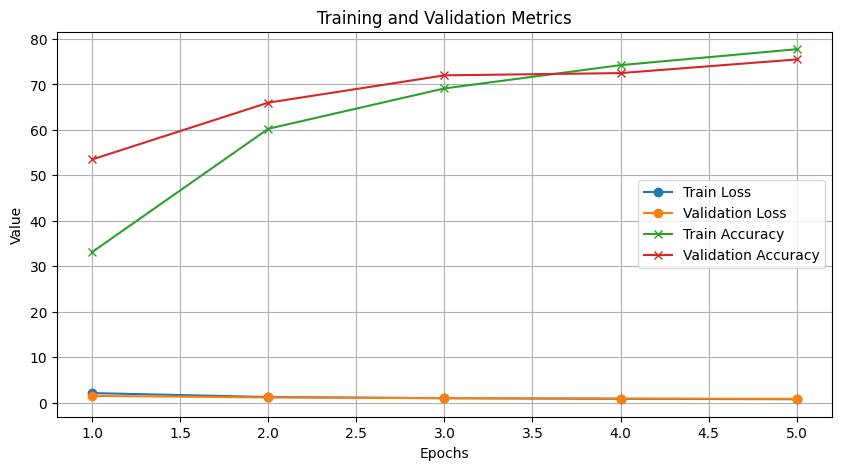

In [ ]:
import numpy as np  # For numerical operations and matrix manipulations
import pandas as pd  # For handling data loading and manipulation
import matplotlib.pyplot as plt  # For visualizing metrics

# Load the MNIST dataset from a CSV file
def load_mnist_dataset(filepath):
    data = pd.read_csv(filepath)  # Read the CSV file into a pandas DataFrame
    labels = data.iloc[:, 0].values  # Extract the first column as labels (digit values)
    pixels = data.iloc[:, 1:].values / 255.0  # Normalize pixel values to range [0, 1]
    return pixels, labels  # Return pixel data and labels

# Apply fuzzification to an image
def fuzzify_image(image):
    # Limit pixel intensity to a maximum of 0.5 as an example of fuzzification
    fuzzified = np.where(image > 0.5, 0.5, image)
    return fuzzified

# Perform a convolution operation on an image
def convolution(image, kernel):
    kernel_size = kernel.shape[0]  # Get the size of the kernel
    output_size = image.shape[0] - kernel_size + 1  # Calculate output dimensions
    output = np.zeros((output_size, output_size))  # Initialize the output array
    for i in range(output_size):  # Loop through rows
        for j in range(output_size):  # Loop through columns
            region = image[i:i+kernel_size, j:j+kernel_size]  # Extract region of interest
            output[i, j] = np.sum(region * kernel)  # Apply the kernel
    return output

# Perform max-pooling on an image
def max_pool(image, pool_size=2):
    output_size = image.shape[0] // pool_size  # Calculate output dimensions
    output = np.zeros((output_size, output_size))  # Initialize the output array
    for i in range(output_size):  # Loop through rows
        for j in range(output_size):  # Loop through columns
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            output[i, j] = np.max(region)  # Take the maximum value in the region
    return output

# Perform a dense layer operation
def dense_layer(flattened_input, weights, biases):
    return np.dot(flattened_input, weights) + biases  # Weighted sum and bias addition

# Apply the softmax activation function
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)  # Normalize probabilities

# Compute cross-entropy loss
def cross_entropy_loss(predicted, actual):
    return -np.log(predicted[actual])  # Log loss for the true class

# Perform gradient descent to update weights and biases
def gradient_descent(weights, biases, flattened_input, predicted, actual, learning_rate=0.01):
    one_hot_actual = np.zeros_like(predicted)  # Create one-hot encoding for the true label
    one_hot_actual[actual] = 1
    gradient = predicted - one_hot_actual  # Calculate gradient
    weights_gradient = np.outer(flattened_input, gradient)  # Weight gradients
    biases_gradient = gradient  # Bias gradients
    weights -= learning_rate * weights_gradient  # Update weights
    biases -= learning_rate * biases_gradient  # Update biases
    return weights, biases

# Perform a forward pass through the CNN
def cnn_forward(image, kernel, weights, biases):
    conv_output = convolution(image, kernel)  # Convolution layer
    pooled_output = max_pool(conv_output)  # Max-pooling layer
    flat_output = pooled_output.flatten()  # Flatten the pooled output
    dense_output = dense_layer(flat_output, weights, biases)  # Dense layer
    return dense_output, flat_output

# Train the CNN and track validation metrics
def train_cnn(pixels, labels, kernel, weights, biases, validation_pixels, validation_labels, epochs=5, learning_rate=0.01):
    history = {"val_loss": [], "val_accuracy": [], "train_loss": [], "train_accuracy": []}  # Initialize metrics

    for epoch in range(epochs):  # Loop through epochs
        total_train_loss = 0  # Track total training loss
        correct_train_predictions = 0  # Track correct training predictions

        # Training loop
        for i in range(len(pixels)):
            image = pixels[i].reshape(28, 28)  # Reshape flattened image to 28x28
            label = labels[i]  # Get the true label

            fuzzified_image = fuzzify_image(image)  # Fuzzify the image

            dense_output, flat_output = cnn_forward(fuzzified_image, kernel, weights, biases)  # Forward pass
            predicted_probs = softmax(dense_output)  # Compute probabilities
            predicted_label = np.argmax(predicted_probs)  # Get predicted label

            loss = cross_entropy_loss(predicted_probs, label)  # Compute loss
            total_train_loss += loss

            weights, biases = gradient_descent(weights, biases, flat_output, predicted_probs, label, learning_rate)  # Update weights

            if predicted_label == label:  # Check if prediction is correct
                correct_train_predictions += 1

        train_accuracy = (correct_train_predictions / len(pixels)) * 100  # Calculate training accuracy
        train_loss = total_train_loss / len(pixels)  # Calculate average training loss
        history["train_loss"].append(train_loss)
        history["train_accuracy"].append(train_accuracy)

        # Validation loop
        total_val_loss = 0
        correct_val_predictions = 0

       # Loop through each validation sample
for i in range(len(validation_pixels)):
    # Reshape the validation pixel data into a 28x28 image
    image = validation_pixels[i].reshape(28, 28)
    # Get the corresponding label for the validation image
    label = validation_labels[i]

    # Apply fuzzification to the image
    fuzzified_image = fuzzify_image(image)

    # Perform a forward pass through the CNN to get dense layer output
    dense_output, _ = cnn_forward(fuzzified_image, kernel, weights, biases)

    # Apply softmax to the dense layer output to get predicted probabilities
    predicted_probs = softmax(dense_output)
    # Determine the predicted label (class with highest probability)
    predicted_label = np.argmax(predicted_probs)

    # Compute the cross-entropy loss for the prediction
    loss = cross_entropy_loss(predicted_probs, label)
    # Accumulate the validation loss
    total_val_loss += loss

    # If the predicted label matches the actual label, count it as correct
    if predicted_label == label:
        correct_val_predictions += 1

# Calculate the validation accuracy as a percentage
val_accuracy = (correct_val_predictions / len(validation_pixels)) * 100
# Calculate the average validation loss for the epoch
val_loss = total_val_loss / len(validation_pixels)
# Append the validation loss to the history dictionary for later analysis
history["val_loss"].append(val_loss)
# Append the validation accuracy to the history dictionary for later analysis
history["val_accuracy"].append(val_accuracy)

# Print metrics for the current epoch
print(f"Epoch {epoch+1}/{epochs}")
print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

# Return updated weights, biases, and training history for analysis
return weights, biases, history


# Plot training and validation metrics
def plot_metrics(history):
    epochs = range(1, len(history["val_accuracy"]) + 1)  # Get range of epochs

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history["train_loss"], label="Train Loss", marker="o")  # Plot train loss
    plt.plot(epochs, history["val_loss"], label="Validation Loss", marker="o")  # Plot validation loss
    plt.plot(epochs, history["train_accuracy"], label="Train Accuracy", marker="x")  # Plot train accuracy
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy", marker="x")  # Plot validation accuracy
    plt.title("Training and Validation Metrics")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# Load the dataset
filepath = '/content/Mnist dataset.csv'
pixels, labels = load_mnist_dataset(filepath)

# Split into training and validation datasets
train_pixels, train_labels = pixels[:800], labels[:800]  # First 800 samples for training
val_pixels, val_labels = pixels[800:1000], labels[800:1000]  # Last 200 samples for validation

# Initialize kernel, weights, and biases
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
weights = np.random.rand(13 * 13, 10)  # Random weights for dense layer
biases = np.random.rand(10)  # Random biases

# Train the CNN and plot metrics
weights, biases, history = train_cnn(train_pixels, train_labels, kernel, weights, biases, val_pixels, val_labels, epochs=5)
plot_metrics(history)  # Visualize results


Epoch 1/3 - Loss: 2043.3301, Accuracy: 38.10%
Epoch 2/3 - Loss: 1021.0325, Accuracy: 66.00%
Epoch 3/3 - Loss: 783.5911, Accuracy: 74.20%


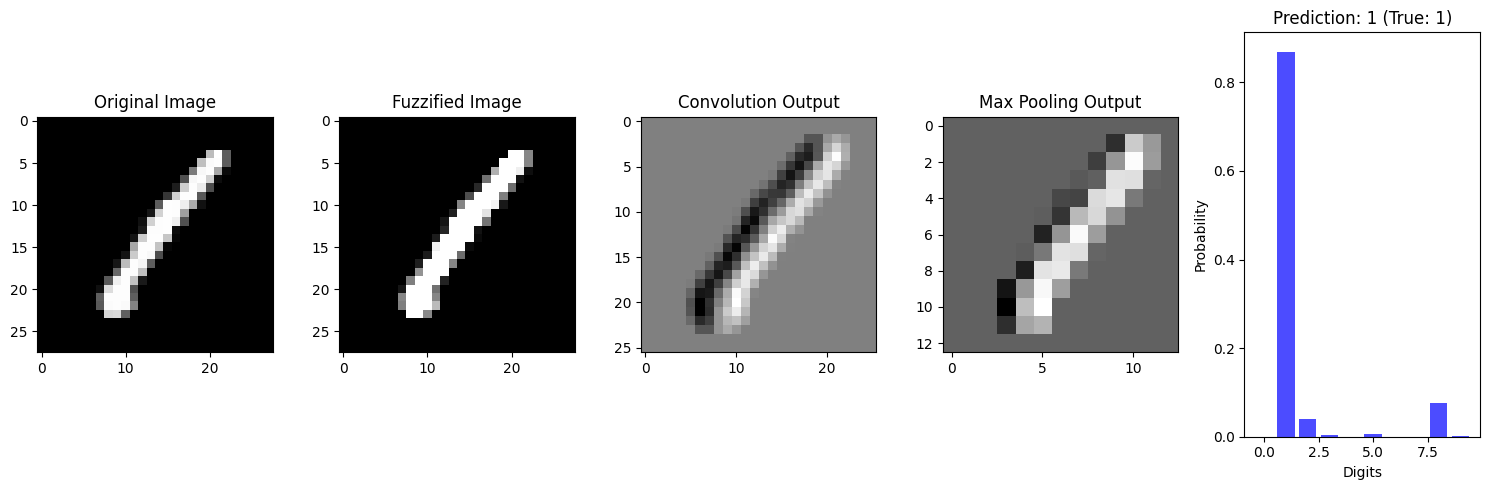

In [ ]:
import numpy as np  # Library for numerical computations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for plotting and visualization

# Load the dataset
def load_mnist_dataset(filepath):
    data = pd.read_csv(filepath)  # Read the MNIST dataset from a CSV file
    labels = data.iloc[:, 0].values  # Extract the first column as the labels (digits)
    pixels = data.iloc[:, 1:].values / 255.0  # Normalize pixel values (0-255) to (0-1)
    return pixels, labels  # Return normalized pixels and labels

# Fuzzification: reduce pixel intensities for uncertain cases
def fuzzify_image(image):
    # Limit pixel intensities greater than 0.7 to 0.7 to introduce fuzziness
    fuzzified = np.where(image > 0.7, 0.7, image)
    return fuzzified  # Return fuzzified image

# Convolution operation
def convolution(image, kernel):
    kernel_size = kernel.shape[0]  # Determine the size of the kernel
    output_size = image.shape[0] - kernel_size + 1  # Calculate the output size
    output = np.zeros((output_size, output_size))  # Initialize the output with zeros
    for i in range(output_size):  # Iterate over rows of the image
        for j in range(output_size):  # Iterate over columns of the image
            # Extract the region of the image corresponding to the kernel
            region = image[i:i+kernel_size, j:j+kernel_size]
            # Compute the convolution (dot product) of the region and the kernel
            output[i, j] = np.sum(region * kernel)
    return output  # Return the convolved image

# Max pooling operation
def max_pool(image, pool_size=2):
    output_size = image.shape[0] // pool_size  # Determine the output size after pooling
    output = np.zeros((output_size, output_size))  # Initialize the output with zeros
    for i in range(output_size):  # Iterate over rows of the image
        for j in range(output_size):  # Iterate over columns of the image
            # Extract the region of the image for pooling
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            output[i, j] = np.max(region)  # Apply max pooling
    return output  # Return the pooled image

# Dense layer
def dense_layer(flattened_input, weights, biases):
    # Compute the output of the dense layer: input dot weights + biases
    return np.dot(flattened_input, weights) + biases

# Softmax activation
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Compute exponentials with stability improvement
    return exp_x / np.sum(exp_x)  # Normalize to get probabilities

# Cross-entropy loss
def cross_entropy_loss(predicted, actual):
    # Compute the loss for the true label using negative log probability
    return -np.log(predicted[actual])

# Gradient descent
def gradient_descent(weights, biases, flattened_input, predicted, actual, learning_rate=0.01):
    one_hot_actual = np.zeros_like(predicted)  # Initialize one-hot encoding for the true label
    one_hot_actual[actual] = 1  # Set the true label index to 1
    gradient = predicted - one_hot_actual  # Compute the gradient for predictions
    weights_gradient = np.outer(flattened_input, gradient)  # Compute weight gradients
    biases_gradient = gradient  # Gradient for biases
    weights -= learning_rate * weights_gradient  # Update weights
    biases -= learning_rate * biases_gradient  # Update biases
    return weights, biases  # Return updated weights and biases

# Forward pass through the CNN
def cnn_forward(image, kernel, weights, biases):
    conv_output = convolution(image, kernel)  # Apply convolution
    pooled_output = max_pool(conv_output)  # Apply max pooling
    flat_output = pooled_output.flatten()  # Flatten the pooled output
    dense_output = dense_layer(flat_output, weights, biases)  # Apply dense layer
    return dense_output, flat_output  # Return dense output and flattened input

# Training loop for the CNN
def train_cnn(pixels, labels, kernel, weights, biases, epochs=5, learning_rate=0.01):
    for epoch in range(epochs):  # Loop through each epoch
        total_loss = 0  # Initialize total loss
        correct_predictions = 0  # Initialize correct prediction count

        for i in range(len(pixels)):  # Iterate through each image
            image = pixels[i].reshape(28, 28)  # Reshape image to 28x28
            label = labels[i]  # Get the true label

            fuzzified_image = fuzzify_image(image)  # Fuzzify the image

            dense_output, flat_output = cnn_forward(fuzzified_image, kernel, weights, biases)  # Forward pass
            predicted_probs = softmax(dense_output)  # Apply softmax to get probabilities
            predicted_label = np.argmax(predicted_probs)  # Get the predicted label

            loss = cross_entropy_loss(predicted_probs, label)  # Calculate loss
            total_loss += loss  # Accumulate total loss

            # Update weights and biases using gradient descent
            weights, biases = gradient_descent(weights, biases, flat_output, predicted_probs, label, learning_rate)

            if predicted_label == label:  # Check if the prediction is correct
                correct_predictions += 1

        accuracy = (correct_predictions / len(pixels)) * 100  # Calculate accuracy
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")  # Print metrics

    return weights, biases  # Return the trained weights and biases

# Visualize prediction and intermediate steps
def visualize_example(image, fuzzified_image, conv_output, pooled_output, predicted_probs, true_label):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Create a subplot with 5 panels

    axes[0].imshow(image, cmap='gray')  # Display original image
    axes[0].set_title("Original Image")

    axes[1].imshow(fuzzified_image, cmap='gray')  # Display fuzzified image
    axes[1].set_title("Fuzzified Image")

    axes[2].imshow(conv_output, cmap='gray')  # Display convolution output
    axes[2].set_title("Convolution Output")

    axes[3].imshow(pooled_output, cmap='gray')  # Display max pooling output
    axes[3].set_title("Max Pooling Output")

    axes[4].bar(range(10), predicted_probs, color='blue', alpha=0.7)  # Plot probabilities
    axes[4].set_title(f"Prediction: {np.argmax(predicted_probs)} (True: {true_label})")
    axes[4].set_xlabel("Digits")
    axes[4].set_ylabel("Probability")

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the visualization

# Main script
filepath = '/content/Mnist dataset.csv'  # Path to your dataset
pixels, labels = load_mnist_dataset(filepath)  # Load dataset

pixels = pixels[:1000]  # Use a subset of images for simplicity
labels = labels[:1000]  # Use a subset of labels

kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel for edge detection
weights = np.random.rand(13 * 13, 10)  # Randomly initialize weights for the dense layer
biases = np.random.rand(10)  # Randomly initialize biases for the dense layer

weights, biases = train_cnn(pixels, labels, kernel, weights, biases, epochs=3)  # Train the model

test_image = pixels[0].reshape(28, 28)  # Select a test image
true_label = labels[0]  # Get the true label of the test image

fuzzified_image = fuzzify_image(test_image)  # Fuzzify the test image
conv_output = convolution(fuzzified_image, kernel)  # Apply convolution
pooled_output = max_pool(conv_output)  # Apply max pooling
dense_output, _ = cnn_forward(fuzzified_image, kernel, weights, biases)  # Forward pass
predicted_probs = softmax(dense_output)  # Apply softmax to get probabilities

visualize_example(test_image, fuzzified_image, conv_output, pooled_output, predicted_probs, true_label)  # Visualize results


In [6]:
import numpy as np
import pandas as pd

# Load the dataset
def load_mnist_dataset(filepath):
    data = pd.read_csv(filepath)
    labels = data.iloc[:, 0].values  # Labels (first column)
    pixels = data.iloc[:, 1:].values / 255.0  # Normalize pixel values to 0-1
    return pixels, labels

# Fuzzification: Reduce pixel intensities for ambiguous digits
def fuzzify_image(image):
    return np.where(image > 0.7, 0.7, image)  # Cap intensities at 0.7

# Convolution operation
def convolution(image, kernel):
    kernel_size = kernel.shape[0]
    output_size = image.shape[0] - kernel_size + 1
    output = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            region = image[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)
    return output

# Max pooling operation
def max_pool(image, pool_size=2):
    output_size = image.shape[0] // pool_size
    output = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            region = image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size]
            output[i, j] = np.max(region)
    return output

# Dense layer
def dense_layer(flattened_input, weights, biases):
    return np.dot(flattened_input, weights) + biases

# Softmax activation
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Forward pass
def cnn_forward(image, kernel, weights, biases):
    conv_output = convolution(image, kernel)
    pooled_output = max_pool(conv_output)
    flat_output = pooled_output.flatten()
    dense_output = dense_layer(flat_output, weights, biases)
    return dense_output

# Accuracy calculation
def calculate_accuracy(pixels, labels, kernel, weights, biases, fuzzify=False):
    correct_predictions = 0
    for i in range(len(pixels)):
        image = pixels[i].reshape(28, 28)
        if fuzzify:
            image = fuzzify_image(image)  # Apply fuzzification for Fuzzy-CNN

        output = cnn_forward(image, kernel, weights, biases)
        predicted_label = np.argmax(softmax(output))
        if predicted_label == labels[i]:
            correct_predictions += 1
    return (correct_predictions / len(pixels)) * 100

# Load dataset
filepath = '/content/Mnist dataset.csv'
pixels, labels = load_mnist_dataset(filepath)

# Use a subset for simplicity
pixels = pixels[:10000]
labels = labels[:10000]

# Initialize kernel, weights, and biases
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example kernel
weights = np.random.rand(13 * 13, 10)  # Random initialization
biases = np.random.rand(10)

# Evaluate Traditional CNN
traditional_cnn_accuracy = calculate_accuracy(pixels, labels, kernel, weights, biases, fuzzify=False)
print(f"Traditional CNN Accuracy: {traditional_cnn_accuracy:.2f}%")

# Evaluate Fuzzy-CNN
fuzzy_cnn_accuracy = calculate_accuracy(pixels, labels, kernel, weights, biases, fuzzify=True)
print(f"Fuzzy-CNN Accuracy: {fuzzy_cnn_accuracy:.2f}%")
# Load dataset
filepath = '/content/Mnist dataset.csv'
pixels, labels = load_mnist_dataset(filepath)


Traditional CNN Accuracy: 11.86%
Fuzzy-CNN Accuracy: 11.89%
